In [1]:
# Google Colab에서 파일 업로드를 위한 라이브러리 불러오기
from google.colab import files

# 업로드한 파일을 저장하기 위한 딕셔너리 생성
uploaded = files.upload()

Saving Sample Data (Cache Size & Hit Rate).csv to Sample Data (Cache Size & Hit Rate).csv


In [3]:
# pandas 라이브러리 불러오기
import pandas as pd

# 업로드한 파일 중 첫 번째 파일을 읽어와 DataFrame으로 저장
df = pd.read_csv(next(iter(uploaded)))

# DataFrame의 크기 출력
print(df.shape)
# DataFrame의 처음 11개 행 출력
df.head(11)

(11, 2)


,Cache Size (GB),Hit Rate (%)
0,10,80
1,15,85
2,20,90
3,25,92
4,30,93
5,35,94
6,40,95
7,45,96
8,50,97
9,55,98


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 가정: df가 DataFrame으로 주어졌다고 가정합니다.
X = df["Cache Size (GB)"].values[:, np.newaxis]
y = df["Hit Rate (%)"].values

# 독립 변수 행렬에 상수 항 추가
X = sm.add_constant(X)

# OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 기울기 (m_hat)와 절편 (b_hat) 얻기
m_hat = model.params[1]
b_hat = model.params[0]

# 데이터에 대한 예측 생성
y_hat = model.predict(X)

# 잔차 계산
residuals = y - y_hat

# 기울기와 절편 출력
print("Slope Coefficient: ", m_hat)
print("Intercept Value: ", b_hat)

Slope Coefficient:  0.3236363636363644
Intercept Value:  81.30909090909088


In [8]:
# 평균 제곱 오차 (MSE)와 R-제곱 계산
mse = mean_squared_error(y, y_hat)
r_squared = r2_score(y, y_hat)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 4.046280991735544
R-squared: 0.8661563696008745


In [10]:
# 새 값에 대한 예측 생성
new_value = 33
prediction = m_hat * new_value + b_hat

print(f'Prediction for {new_value} GB: {prediction}')

Prediction for 33 GB: 91.9890909090909


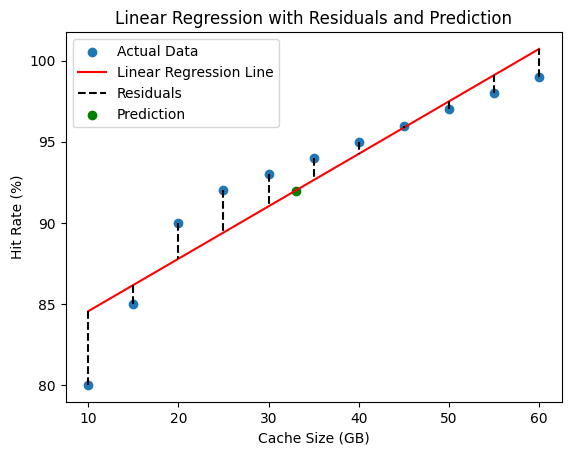

In [11]:
# 데이터 포인트 플로팅
plt.scatter(X[:, 1], y, label='Actual Data')

# OLS 회귀선 플로팅
plt.plot(X[:, 1], y_hat, color='red', label='Linear Regression Line')

# 잔차 플로팅
plt.vlines(x=X[:, 1], ymin=y, ymax=y_hat, color='black', linestyle='dashed', label='Residuals')

# 새로운 예측 지점 플로팅
plt.scatter(new_value, prediction, color='green', label='Prediction')

# y축 레이블 지정: "히트 비율 (%)"
plt.ylabel("Hit Rate (%)")

# x축 레이블 지정: "캐시 크기 (GB)"
plt.xlabel("Cache Size (GB)")

# 그림 제목 설정
plt.title("Linear Regression with Residuals and Prediction")

# 범례 표시
plt.legend()

# 그림 표시
plt.show()